<a href="https://colab.research.google.com/github/MaurizioAba/aviation_accidents_analysis1991_2023/blob/main/aviation_accidents_analysis1991_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi dei disastri aerei dal 1919 al 2023
La neonata IASS (International Alliance for Safe Skies) ha incaricato di svolgere un'accurata analisi di tutti gli incidenti aerei che si sono verificati dal 1919 al 2023.

A tale scopo mette a disposizione un set di dati in cui sono registrati oltre 100.000 incidenti con le seguenti informazioni

- date: data dell'incidente
- type: tipo del veivolo
- registration: codice di registrazione del veivolo
- operator: operatore del veivolo
- fatalities: numero di morti
- location: luogo dell'incidente
- country: nazione dell'incidente
- cat: categoria dell'incidente come descritto dal ASN

Utilizza i dati per portale alla luce, anche tramite grafici e visualizzazioni, utili insight.

#### ESEMPI DI INSIGHT
 - In quale nazione si sono verificati più incidenti?
 - Gli incidenti avvengono più di frequente durante determinate fasce orarie?
 - Quali sono gli operatori più sicuri?
 - Quale tipo di veivolo ha causato più morti?
 - Come si sono evoluti gli incidenti dopo l'11 Settembre?

##EXTRA
Creare un cartogramma che rappresenti il numero di incidenti per nazione

### [Link al dataset](https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv)

Il dataset contiene informazioni su incidenti però, sembra avere alcune incongruenze, come date sconosciute e alcune colonne vuote. Fase del preprocessing dei dati per pulire il dataset e renderlo utilizzabile per l'analisi. Ecco i passaggi principali che seguiremo:

Pulizia delle Date: Gestire le date sconosciute e convertirle in un formato utilizzabile.
Gestione dei Valori Mancanti: Riempire o rimuovere i valori mancanti dove necessario.
Conversione delle Colonne: Assicurarsi che le colonne siano nei formati corretti.

In [ ]:
import pandas as pd

# Caricare il dataset
file_path = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv'
df = pd.read_csv(file_path)

# Sostituire 'date unk.' con NaN e convertire la colonna delle date in formato datetime
df['date'] = df['date'].replace('date unk.', pd.NaT)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Gestire i valori mancanti
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)

# Mostrare le informazioni del dataset
df.info()



<ipython-input-2-6f310731f25d>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          23408 non-null  datetime64[ns]
 1   type          23967 non-null  object        
 2   registration  22419 non-null  object        
 3   operator      23963 non-null  object        
 4   fatalities    23967 non-null  float64       
 5   location      23019 non-null  object        
 6   country       23967 non-null  object        
 7   cat           23967 non-null  object        
 8   year          23967 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.6+ MB


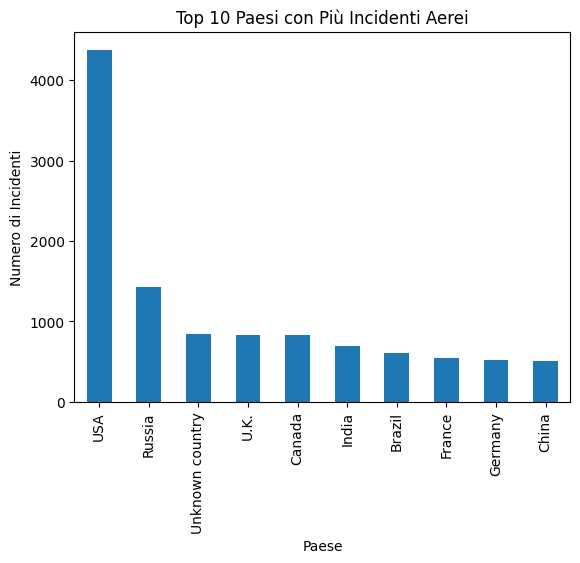

In [ ]:
import matplotlib.pyplot as plt

# Numero di incidenti per nazione
incidents_per_country = df['country'].value_counts()

# Visualizzare i primi 10 paesi con più incidenti
top_countries = incidents_per_country.head(10)
top_countries.plot(kind='bar', title='Top 10 Paesi con Più Incidenti Aerei')
plt.xlabel('Paese')
plt.ylabel('Numero di Incidenti')
plt.show()


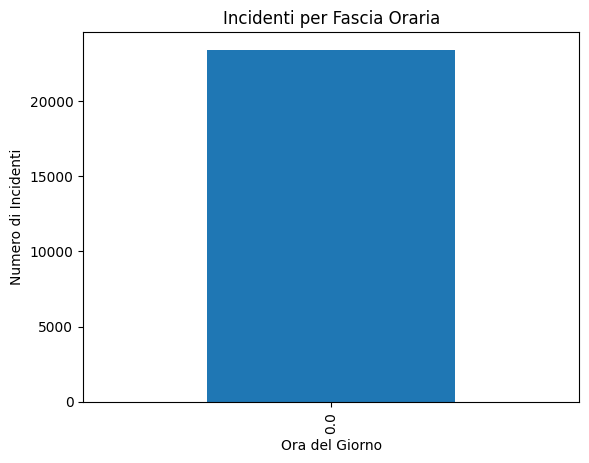

In [ ]:
# Estrarre l'ora dell'incidente
df['hour'] = df['date'].dt.hour
incidents_per_hour = df['hour'].value_counts().sort_index()

# Visualizzare il numero di incidenti per fascia oraria
incidents_per_hour.plot(kind='bar', title='Incidenti per Fascia Oraria')
plt.xlabel('Ora del Giorno')
plt.ylabel('Numero di Incidenti')
plt.show()


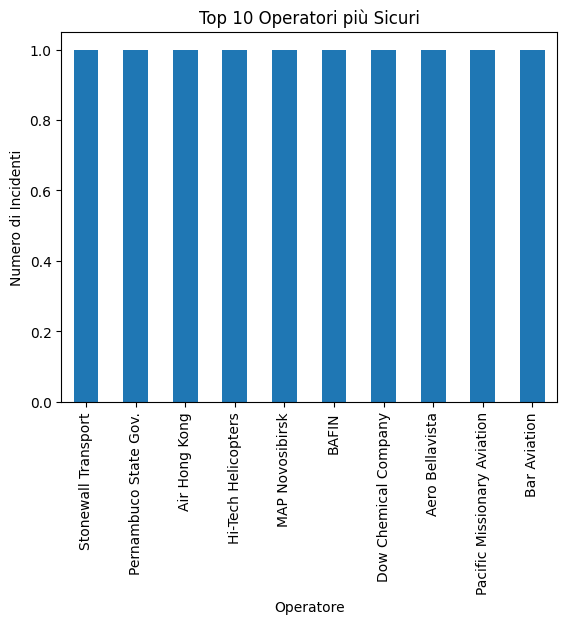

In [ ]:
# Calcolare il numero di incidenti per operatore
incidents_per_operator = df['operator'].value_counts()

# Visualizzare i primi 10 operatori con meno incidenti
safest_operators = incidents_per_operator.tail(10)
safest_operators.plot(kind='bar', title='Top 10 Operatori più Sicuri')
plt.xlabel('Operatore')
plt.ylabel('Numero di Incidenti')
plt.show()


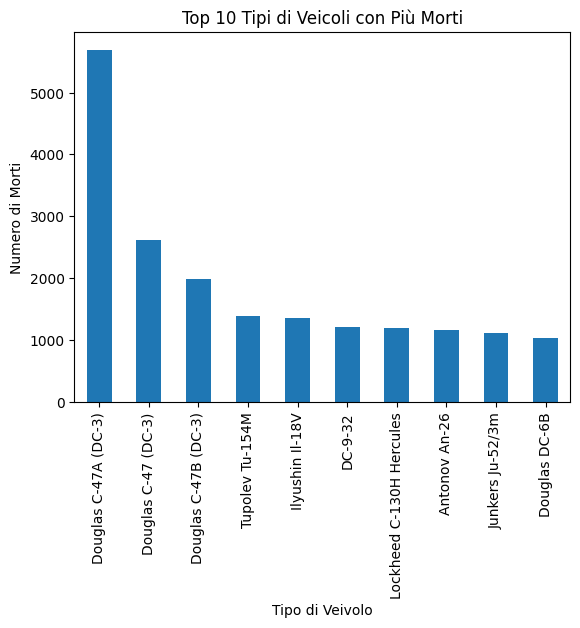

In [ ]:
# Calcolare il numero di morti per tipo di veivolo
fatalities_per_type = df.groupby('type')['fatalities'].sum().sort_values(ascending=False)

# Visualizzare i primi 10 tipi di veicoli con più morti
top_fatalities_types = fatalities_per_type.head(10)
top_fatalities_types.plot(kind='bar', title='Top 10 Tipi di Veicoli con Più Morti')
plt.xlabel('Tipo di Veivolo')
plt.ylabel('Numero di Morti')
plt.show()


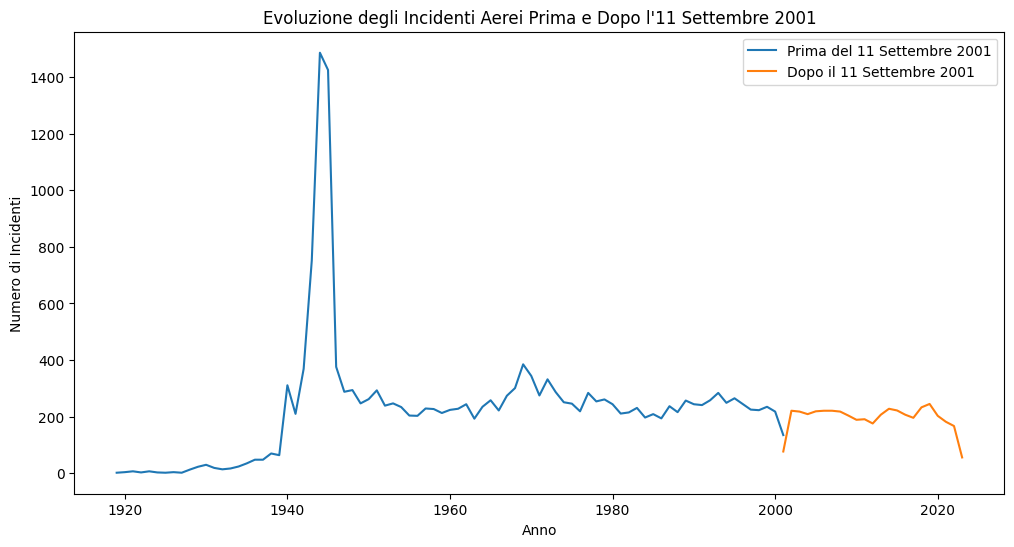

In [ ]:
# Filtrare gli incidenti prima e dopo l'11 Settembre 2001
pre_911 = df[df['date'] < '2001-09-11']
post_911 = df[df['date'] >= '2001-09-11']

# Contare il numero di incidenti per anno prima e dopo l'11 Settembre
incidents_pre_911 = pre_911['date'].dt.year.value_counts().sort_index()
incidents_post_911 = post_911['date'].dt.year.value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(incidents_pre_911, label='Prima del 11 Settembre 2001')
plt.plot(incidents_post_911, label='Dopo il 11 Settembre 2001')
plt.title('Evoluzione degli Incidenti Aerei Prima e Dopo l\'11 Settembre 2001')
plt.xlabel('Anno')
plt.ylabel('Numero di Incidenti')
plt.legend()
plt.show()


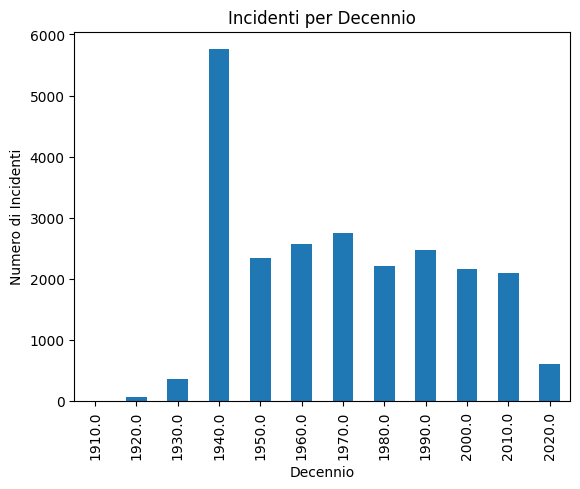

In [ ]:
# Aggiungere una colonna per il decennio
df['decade'] = (df['date'].dt.year // 10) * 10

# Numero di incidenti per decennio
incidents_per_decade = df['decade'].value_counts().sort_index()

# Visualizzare il numero di incidenti per decennio
incidents_per_decade.plot(kind='bar', title='Incidenti per Decennio')
plt.xlabel('Decennio')
plt.ylabel('Numero di Incidenti')
plt.show()


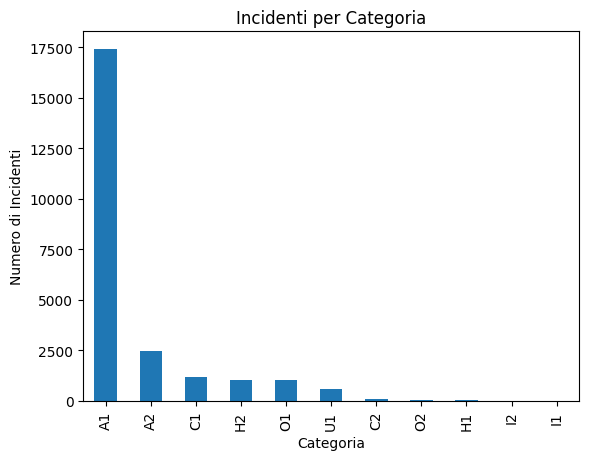

In [ ]:
# Numero di incidenti per categoria
incidents_per_category = df['cat'].value_counts()

# Visualizzare il numero di incidenti per categoria
incidents_per_category.plot(kind='bar', title='Incidenti per Categoria')
plt.xlabel('Categoria')
plt.ylabel('Numero di Incidenti')
plt.show()


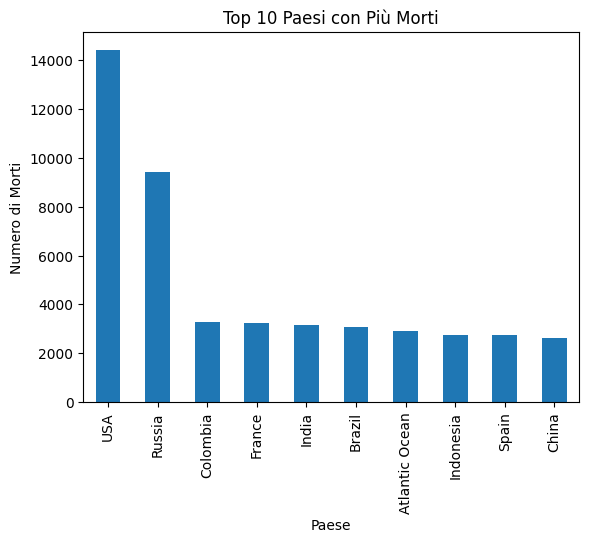

In [ ]:
# Numero di morti per paese
fatalities_per_country = df.groupby('country')['fatalities'].sum().sort_values(ascending=False)

# Visualizzare i primi 10 paesi con più morti
top_fatalities_countries = fatalities_per_country.head(10)
top_fatalities_countries.plot(kind='bar', title='Top 10 Paesi con Più Morti')
plt.xlabel('Paese')
plt.ylabel('Numero di Morti')
plt.show()


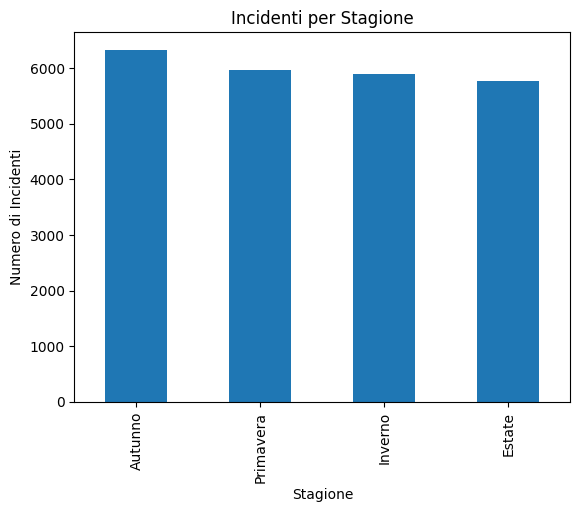

In [ ]:
# Aggiungere una colonna per il mese
df['month'] = df['date'].dt.month

# Mappare i mesi alle stagioni
def get_season(month):
    if month in [12, 1, 2]:
        return 'Inverno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Estate'
    else:
        return 'Autunno'

df['season'] = df['month'].apply(get_season)

# Numero di incidenti per stagione
incidents_per_season = df['season'].value_counts()

# Visualizzare il numero di incidenti per stagione
incidents_per_season.plot(kind='bar', title='Incidenti per Stagione')
plt.xlabel('Stagione')
plt.ylabel('Numero di Incidenti')
plt.show()


Creare un cartogramma degli incidenti aerei per nazione utilizzando geopandas e matplotlib. Verranno utilizzati i dati del dataset per calcolare il numero di incidenti per nazione e visualizzarli sulla mappa.

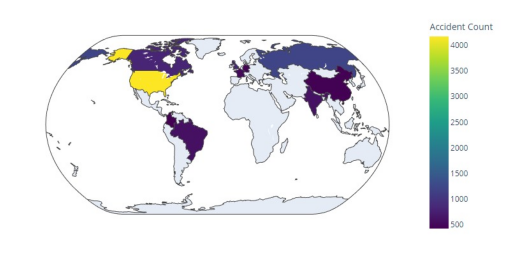

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# URL dell'immagine di base
image_url = 'https://raw.githubusercontent.com/ProfAI/progetti/main/resources/cartogramma_incidenti_aerei.jpg'

# Scaricare l'immagine
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Visualizzare l'immagine per assicurarsi che sia corretta
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd

# URL del file CSV degli incidenti aerei
csv_url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv'

# Caricare il dataset
df = pd.read_csv(csv_url)

# Pulire i dati: rimuovere le righe con nazioni mancanti e convertire i nomi dei paesi in minuscolo
df = df.dropna(subset=['country'])
df['country'] = df['country'].str.lower()

# Aggregare i dati degli incidenti per nazione
incidents_per_country = df['country'].value_counts().reset_index()
incidents_per_country.columns = ['country', 'count']

# Visualizzare le prime righe del DataFrame per assicurarsi che i dati siano corretti
print(incidents_per_country.head())


           country  count
0              usa   4377
1           russia   1422
2  unknown country    838
3             u.k.    837
4           canada    826


<ipython-input-24-f2cfae6e3e10>:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



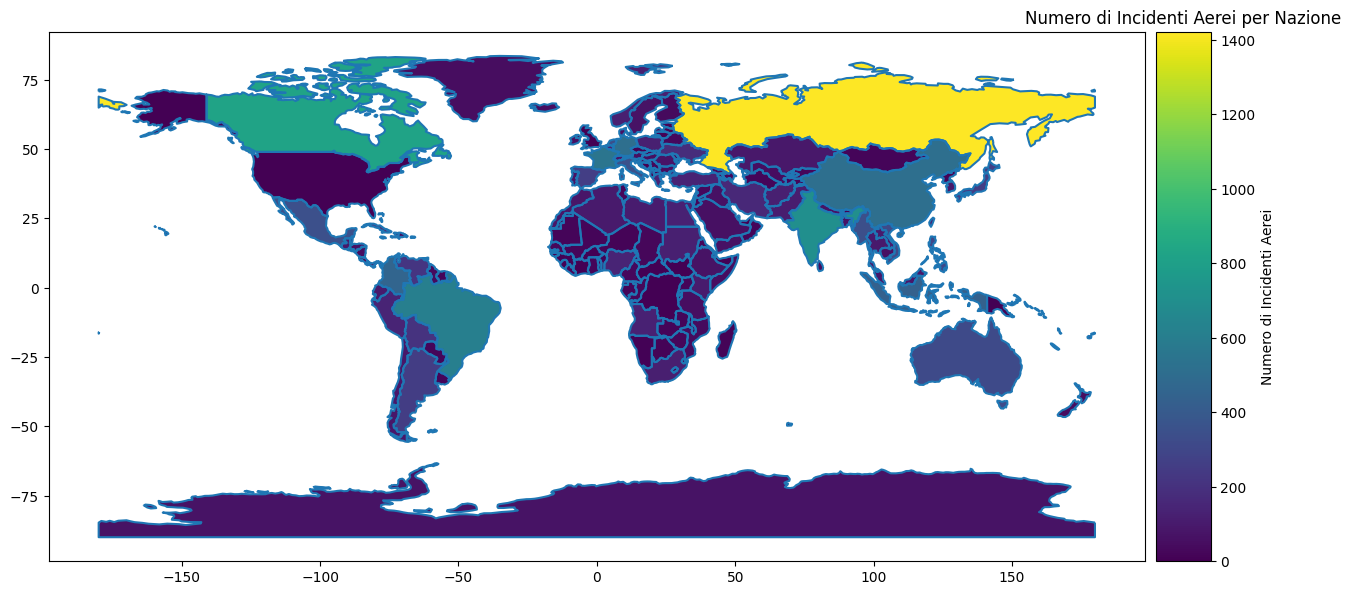

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Caricare i dati geografici
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Caricare il dataset degli incidenti aerei
csv_url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv'
df = pd.read_csv(csv_url)

# Pulire i dati: rimuovere le righe con 'country' mancanti e convertire 'country' in minuscolo
df = df.dropna(subset=['country'])
df['country'] = df['country'].str.lower()

# Aggregare il numero di incidenti per paese
incidents_per_country = df['country'].value_counts().reset_index()
incidents_per_country.columns = ['country', 'count']

# Normalizzare i nomi dei paesi nei dati geografici
world['country'] = world['name'].str.lower()

# Unire i dati geografici con i conteggi degli incidenti
world = world.merge(incidents_per_country, how='left', left_on='country', right_on='country')
world['count'] = world['count'].fillna(0)  # Riempire i valori mancanti con 0

# Tracciare i dati
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax)
world.plot(column='count', ax=ax, legend=True, cax=cax,
           legend_kwds={'label': "Numero di Incidenti Aerei",
                        'orientation': "vertical"},
           cmap='viridis')

plt.title('Numero di Incidenti Aerei per Nazione')
plt.show()
